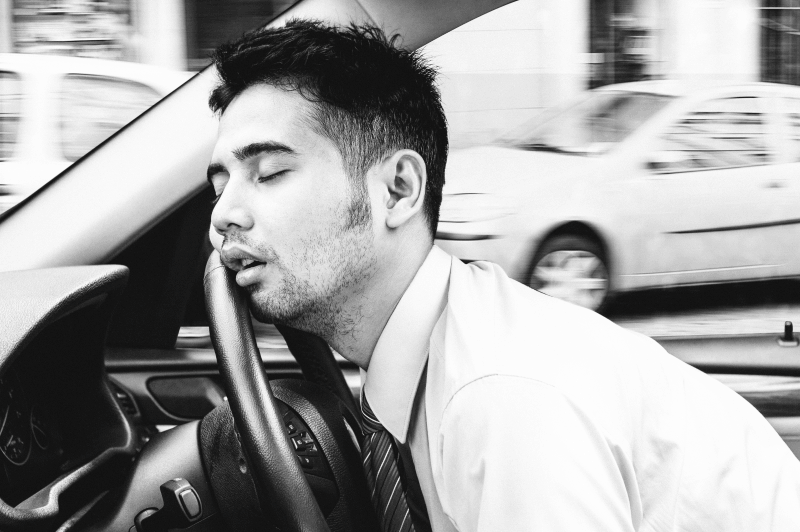!

# so we all know that driving while being tired is very dangerous on both the driver and on people 
# consequently a safe system is important to alert to driver or request the car to take actions 
# An AI system can predict whether a driver is yawning while driving or not be processing immages token by a camera

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"\nfor dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))\n"

In [2]:
from tqdm import tqdm
import matplotlib.pyplot as plt
from skimage.transform import resize

In [3]:
path = os.path.abspath(os.curdir)
print(path)

/kaggle/working


In [4]:
data_path = os.path.join((os.path.join(os.path.join(path, ".."), "input")), "drive-drowsiness")

In [5]:
os.listdir(os.path.join(data_path, "train"))

['Closed', 'Open', 'yawn', 'no_yawn']

In [6]:
labels = ['Closed', 'no_yawn', 'Open', 'yawn']
data_labels = []
data_images = []

for i in tqdm(os.listdir(os.path.join(data_path, "train"))) :
    for j in (os.listdir(os.path.join(os.path.join(data_path, "train"), i))) :
        img = plt.imread(os.path.join(os.path.join(data_path, "train"), i, j))
        data_images.append(img)
        data_labels.append(i)

100%|██████████| 4/4 [00:30<00:00,  7.60s/it]


In [7]:
labels = []
for i in (os.listdir(os.path.join(data_path, "train"))) :
    for j in tqdm(os.listdir(os.path.join(os.path.join(data_path, "train"), i))) :
        labels.append(i)

100%|██████████| 725/725 [00:00<00:00, 736466.55it/s]


In [8]:
features = []
for i in (os.listdir(os.path.join(data_path, "train"))) :
    for j in tqdm(os.listdir(os.path.join(os.path.join(data_path, "train"), i))) :
        img = plt.imread(os.path.join(os.path.join(data_path, "train"), i, j))
        features.append(img)

100%|██████████| 725/725 [00:05<00:00, 138.52it/s]


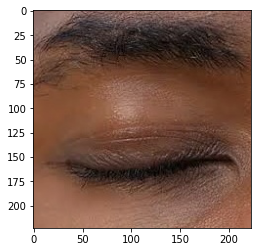

In [9]:
plt.imshow(data_images[0])

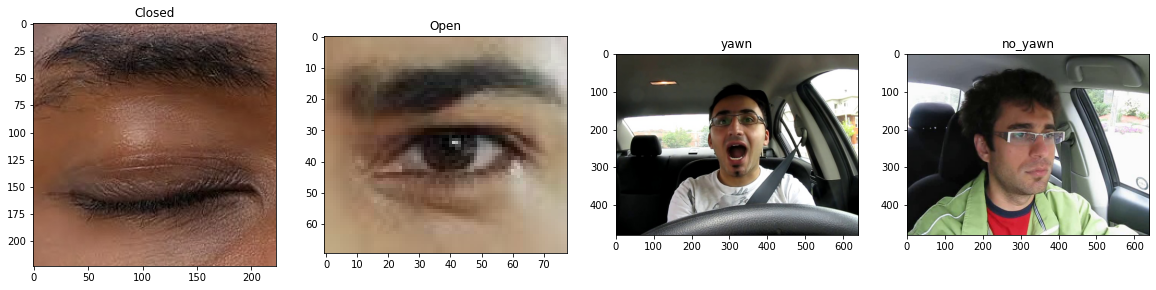

In [10]:
fig = plt.figure(figsize = (20,5))
sum = 0

for i in range(4): 
    fig.add_subplot(1,4, i+1)
    plt.title(labels[sum])
    plt.imshow(features[sum])
    sum += 730

In [11]:
len(data_images)

2900

In [12]:
data_images[200].shape

(270, 270, 3)

In [13]:
from skimage import color
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, MaxPool2D, Flatten, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import EarlyStopping

2021-10-04 22:50:43.151389: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-04 22:50:43.151533: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [14]:
for i in range(len(data_images)) :
    data_images[i] = resize(data_images[i], (32,32, 3), anti_aliasing = True)
    data_images[i] = color.rgb2grey(data_images[i])
    data_images[i] = data_images[i].reshape(32,32,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
data_images , data_labels = shuffle(data_images, data_labels, random_state = 32)
le = LabelEncoder()
data_labels = le.fit_transform(data_labels)
data_labels = to_categorical(data_labels, 4)
x_train, x_test, y_train, y_test = train_test_split(data_images, data_labels, test_size = 0.2, random_state = 32)

In [16]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [17]:
model = Sequential()

model.add(Conv2D(filters = 30, kernel_size = (4,4), input_shape = (32,32, 1), activation = 'relu'))
model.add(Conv2D(filters = 20, kernel_size = (4,4), input_shape = (32,32, 1), activation = 'relu'))

model.add(MaxPool2D(pool_size = (2,2)))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(4, activation = 'softmax'))

model.summary()
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 30)        510       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 20)        9620      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 20)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 20)          0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               92288     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0

2021-10-04 22:54:53.429444: I tensorflow/compiler/jit/xla_cpu_device.cc:41] Not creating XLA devices, tf_xla_enable_xla_devices not set
2021-10-04 22:54:53.432778: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/conda/lib
2021-10-04 22:54:53.432824: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-10-04 22:54:53.432860: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (a3a8c86c3638): /proc/driver/nvidia/version does not exist
2021-10-04 22:54:53.434119: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operation

In [18]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 50)

2021-10-04 22:54:53.908263: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2021-10-04 22:54:53.921546: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 2199995000 Hz


Epoch 1/50
73/73 [==============================] - 5s 66ms/step - loss: 1.0912 - accuracy: 0.4496 - val_loss: 0.4673 - val_accuracy: 0.7948
Epoch 2/50
73/73 [==============================] - 4s 57ms/step - loss: 0.4915 - accuracy: 0.7704 - val_loss: 0.3862 - val_accuracy: 0.7914
Epoch 3/50
73/73 [==============================] - 4s 52ms/step - loss: 0.4050 - accuracy: 0.7981 - val_loss: 0.3578 - val_accuracy: 0.8000
Epoch 4/50
73/73 [==============================] - 4s 54ms/step - loss: 0.3419 - accuracy: 0.8252 - val_loss: 0.3344 - val_accuracy: 0.8241
Epoch 5/50
73/73 [==============================] - 4s 53ms/step - loss: 0.3410 - accuracy: 0.8300 - val_loss: 0.3251 - val_accuracy: 0.8345
Epoch 6/50
73/73 [==============================] - 4s 52ms/step - loss: 0.3007 - accuracy: 0.8551 - val_loss: 0.3103 - val_accuracy: 0.8448
Epoch 7/50
73/73 [==============================] - 4s 52ms/step - loss: 0.2763 - accuracy: 0.8635 - val_loss: 0.3007 - val_accuracy: 0.8534
Epoch 8/50
73

In [19]:
import pandas as pd
import scikitplot as skplot

In [20]:
loss = pd.DataFrame(model.history.history)
loss.head()

,loss,accuracy,val_loss,val_accuracy
0,0.832828,0.598707,0.467334,0.794828
1,0.456805,0.771983,0.386213,0.791379
2,0.394914,0.802155,0.357764,0.800000
3,0.343970,0.823276,0.334393,0.824138
4,0.335936,0.830172,0.325093,0.834483


<AxesSubplot:>

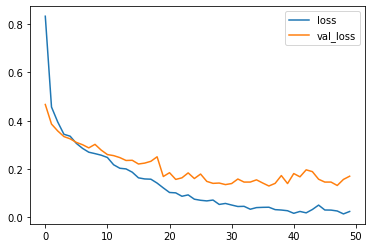

In [21]:
loss[['loss', 'val_loss']].plot()

<AxesSubplot:>

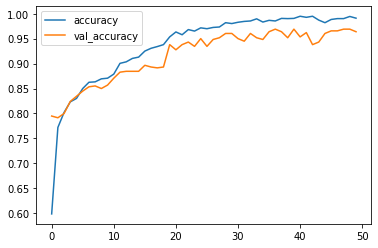

In [22]:
loss[['accuracy', 'val_accuracy']].plot()

In [23]:
labels = shuffle(labels, random_state = 32)

In [24]:
pre = data_images[546]
pre = pre.reshape(1,32,32,1)
val = np.argmax(model.predict(pre))
pred = le.inverse_transform([val])

predicted :  ['yawn']
real_label :  yawn


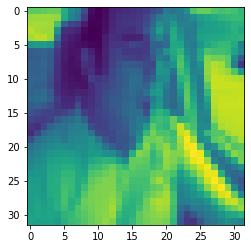

In [25]:
plt.imshow(data_images[546])
print("predicted : ", pred)
print("real_label : ", labels[546])

In [26]:
for i in range(len(data_images)) :
    features[i] = resize(features[i], (32,32, 3), anti_aliasing = True)
    features[i] = color.rgb2grey(features[i])
    features[i] = features[i].reshape(32,32,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  This is separate from the ipykernel package so we can avoid doing imports until


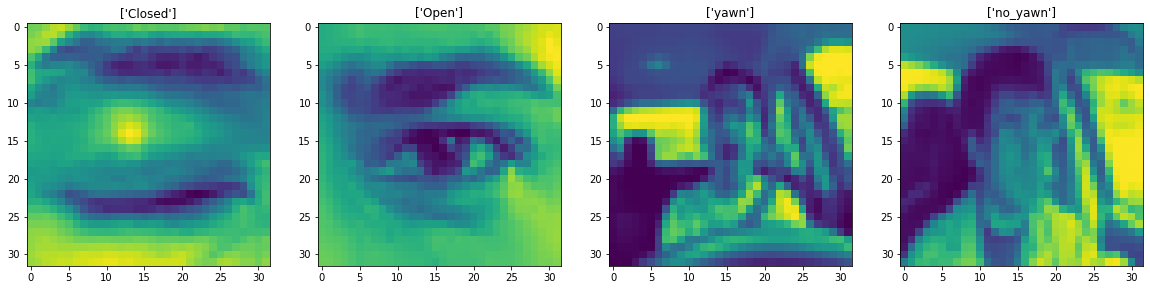

In [27]:
fig = plt.figure(figsize = (20,5))
sum = 0

for i in range(4): 
    p = features[sum]
    p = p.reshape(1,32,32,1)
    val = np.argmax(model.predict(p))
    preds = le.inverse_transform([val])
    fig.add_subplot(1,4, i+1)
    plt.title(preds)
    plt.imshow(features[sum])
    sum += 730

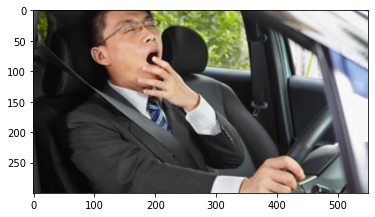

In [28]:
img = plt.imread("/kaggle/input/yawning/yawning-while-driving.jpg")
plt.imshow(img)
                    

In [29]:
img = color.rgb2grey(img)
img = resize(img , (32,32), anti_aliasing = True)
img = img.reshape(32,32,1)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: rgb2grey is deprecated. It will be removed in version 0.19.Please use rgb2gray instead.
  """Entry point for launching an IPython kernel.


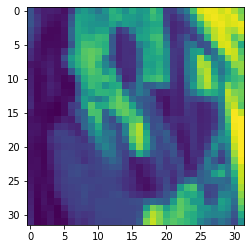

In [30]:
plt.imshow(img)

In [31]:
pre2 = img
pre2 = pre2.reshape(1,32,32,1)
val2 = np.argmax(model.predict(pre2))
pred2 = le.inverse_transform([val2])

['yawn']


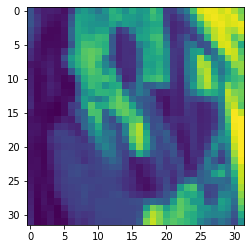

In [32]:
plt.imshow(img)
print(pred2)